In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

import wrangle as wr

Use the ```zillow``` dataset you acquired and prepped in previous lesson. 

In [2]:
df = wr.get_zillow()

In [88]:
df.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037
11,62,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037
14,97,0.0,0.0,171.0,6920.0,1973.0,255.17,6037


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 8 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id                            int64  
 1   bedroomcnt                    float64
 2   bathroomcnt                   float64
 3   calculatedfinishedsquarefeet  float64
 4   taxvaluedollarcnt             float64
 5   yearbuilt                     float64
 6   taxamount                     float64
 7   fips                          int64  
dtypes: float64(6), int64(2)
memory usage: 147.0 MB


In [4]:
df.isnull().sum()

id                              0
bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [129]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

In [8]:
# create a copy of original data frame
df_scaled = df.copy()

#from the previous lesson I know which columns a 
stand_columns = ['bedroomcnt', 'bathroomcnt', 'yearbuilt']
log_columns = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']

In [45]:
df_scaled.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037
11,62,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037
14,97,0.0,0.0,171.0,6920.0,1973.0,255.17,6037


In [114]:
df_scaled[stand_columns] = standard_scaler.fit_transform(df_scaled[stand_columns])
df_scaled[log_columns] = np.log(df_scaled[log_columns])

In [93]:
df_scaled.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,0.749068,-0.242646,8.197814,12.599550,1.987871,8.845257,6037
6,31,-0.323203,1.776437,7.390181,13.650365,2.258745,9.234539,6037
7,33,-0.323203,-0.242646,7.638680,13.379731,-1.578630,8.977737,6037
11,62,-3.540018,-2.261729,7.090077,8.580731,0.498067,4.517431,6037
14,97,-3.540018,-2.261729,5.141664,8.842171,0.543212,5.541930,6037


In [48]:
df.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037
11,62,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037
14,97,0.0,0.0,171.0,6920.0,1973.0,255.17,6037


In [5]:
def before_after_scale(columns):
    plt.figure(figsize = (20,4))
    plt.suptitle('Before Scaling')
    for i, col in enumerate(columns):
        sbplt = i+1
        plt.subplot(1, 3, sbplt)
        plt.title(col)
        df[col].hist(bins = 20)
    plt.figure(figsize = (20,4))
    plt.suptitle('After Scaling')
    for i, col in enumerate(columns):
        sbplt = i+1
        plt.subplot(1, 3, sbplt)
        plt.title(col)
        df_scaled[col].hist(bins = 20)

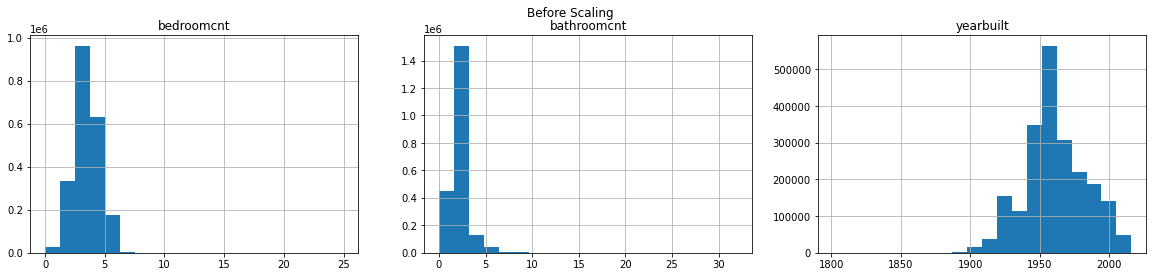

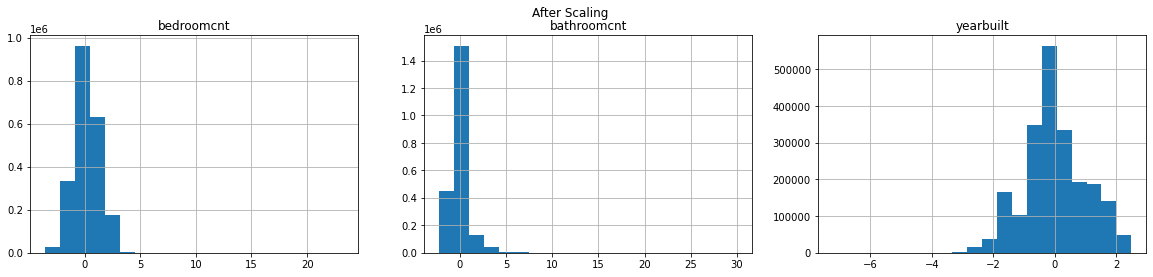

In [115]:
before_after_scale(stand_columns)

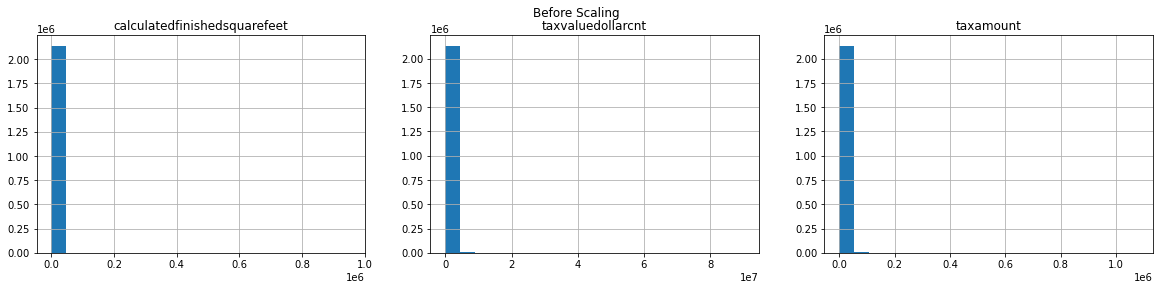

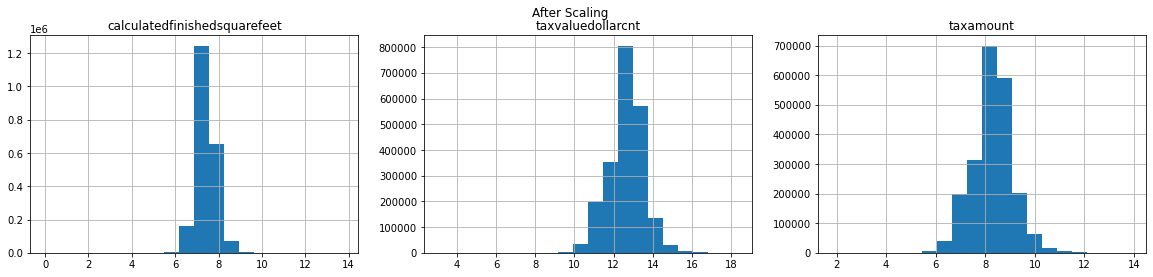

In [116]:
before_after_scale(log_columns)

Try ```MinMaxScaler``` on ```stand_columns```

In [134]:
# back to original
df_scaled = df.copy()

In [132]:
df_scaled[stand_columns] = min_max_scaler.fit_transform(df_scaled[stand_columns])

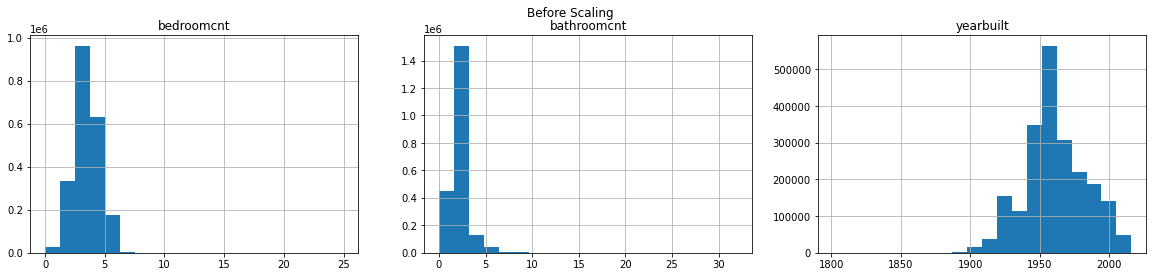

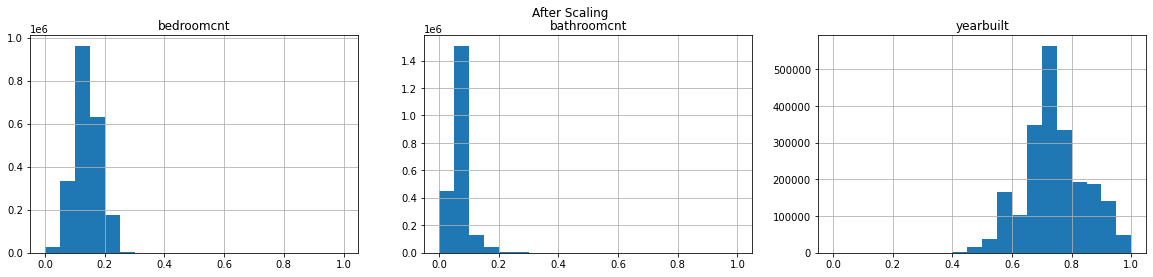

In [133]:
before_after_scale(stand_columns)

Try ```RobustScaler``` on ```stand_columns```

In [135]:
# back to original
df_scaled = df.copy()

In [136]:
df_scaled[stand_columns] = robust_scaler.fit_transform(df[stand_columns])

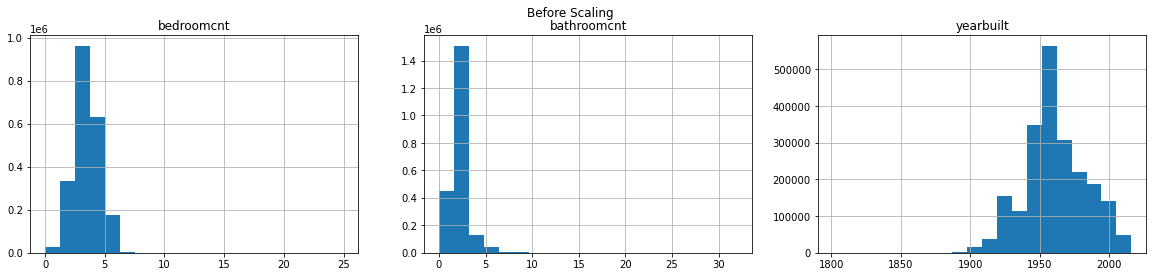

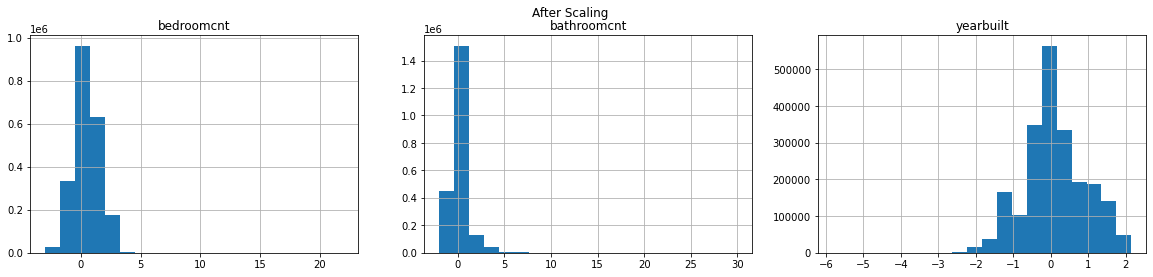

In [137]:
before_after_scale(stand_columns)

Back to ```StandardScaler``` because I use ```inverse_transform``` with it later

In [147]:
df_scaled = df.copy()
df_scaled[stand_columns] = standard_scaler.fit_transform(df_scaled[stand_columns])

Try ```RobustScaler``` with not normally distributed columns

In [148]:
#try robust scaler
df_scaled[log_columns] = robust_scaler.fit_transform(df_scaled[log_columns])

In [149]:
df_scaled.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,0.749068,-0.242646,2.115789,-0.092262,1.987871,0.731041,6037
6,31,-0.323203,1.776437,-0.003158,1.503804,2.258745,1.584434,6037
7,33,-0.323203,-0.242646,0.477895,0.921908,-1.578630,0.985051,6037
11,62,-3.540018,-2.261729,-0.445263,-0.934947,0.498067,-1.038436,6037
14,97,-3.540018,-2.261729,-1.528421,-0.930338,0.543212,-0.996182,6037


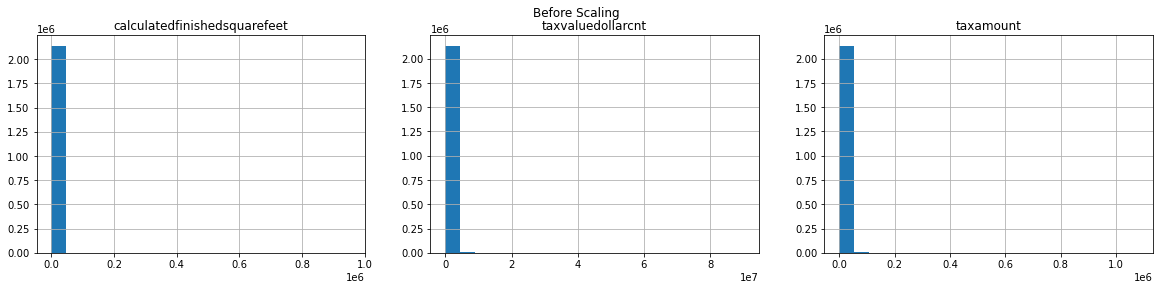

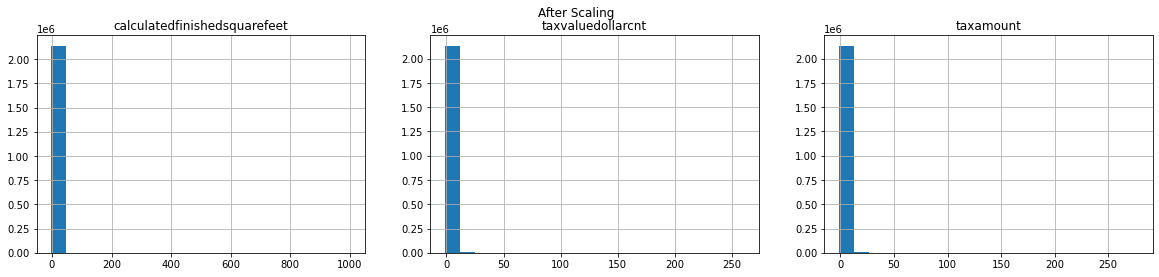

In [142]:
# Visuals below show that linear scaling doen't help much! I'll stick to logarithmic scaling with this columns
# next time
before_after_scale(log_columns)

#### 2. Apply the ```.inverse_transform``` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [150]:
# let's first remove the robust scaler that was applied to log_columns
df_scaled[log_columns] = robust_scaler.inverse_transform(df_scaled[log_columns])

# inverse stand scaler
df_scaled[stand_columns] = standard_scaler.inverse_transform(df_scaled[stand_columns])

In [151]:
df_scaled.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037
11,62,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037
14,97,0.0,0.0,171.0,6920.0,1973.0,255.17,6037


In [146]:
df.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037
6,31,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037
7,33,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037
11,62,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037
14,97,0.0,0.0,171.0,6920.0,1973.0,255.17,6037


Robust scaler did horrible inverse transformation!!!

Standard scaler did correct transformation.

#### 3. Read the documentation for sklearn's ```QuantileTransformer```. Use ```normal``` for the ```output_distribution``` and apply this scaler to your data. Visualize the result of your data scaling.

In [75]:
QuantileTransformer?? # read documentation in the notebook

In [120]:
#back to the original data set

df_scaled = df.copy()

In [121]:
quant_tr = QuantileTransformer(output_distribution='normal')

In [122]:
df_scaled[stand_columns] = quant_tr.fit_transform(df_scaled[stand_columns])

In [123]:
df_scaled[log_columns] = quant_tr.fit_transform(df_scaled[log_columns])

In [106]:
df_scaled.head()

,id,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,20,0.723343,-0.172731,1.693919,-0.135252,1.934489,0.786341,6037
6,31,-0.274391,1.611333,-0.001255,1.280744,2.386340,1.303363,6037
7,33,-0.274391,-0.172731,0.548644,0.931617,-1.431971,0.969568,6037
11,62,-5.199338,-5.199338,-0.817902,-3.432160,0.558392,-3.443811,6037
14,97,-5.199338,-5.199338,-3.334121,-3.359357,0.596935,-3.125682,6037


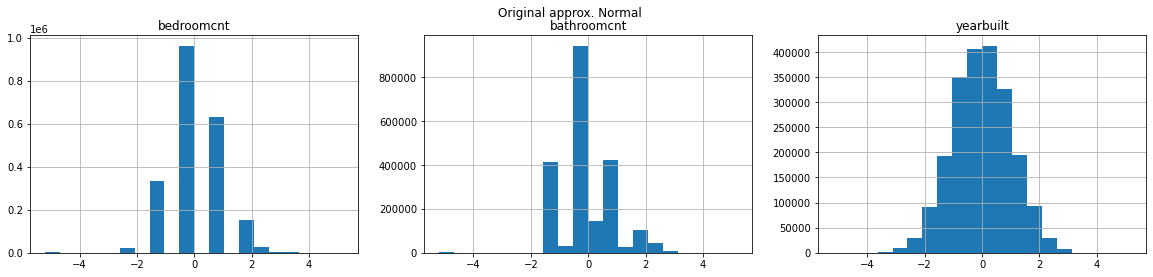

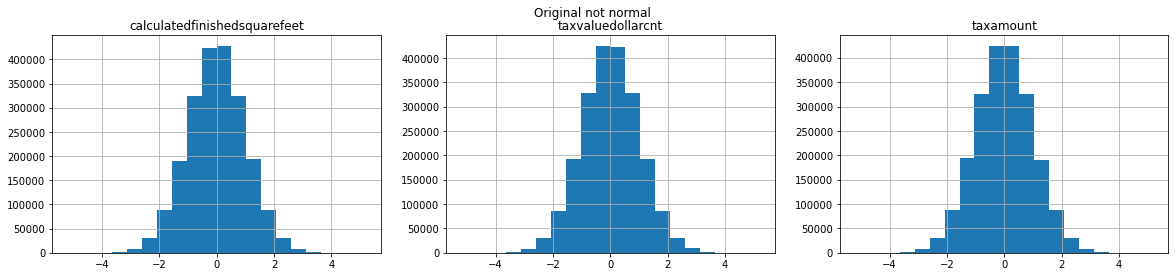

In [107]:
# visualize columns that had approx normal distribution 
# in the original data set
plt.figure(figsize = (20,4))
plt.suptitle('Original approx. Normal')
for i, col in enumerate(stand_columns):
    sbplt = i+1
    plt.subplot(1, 3, sbplt)
    plt.title(col)
    df_scaled[col].hist(bins = 20)
    
# visualize columns that were not normally distributed
# in the original data set
plt.figure(figsize = (20,4))
plt.suptitle('Original not normal')
for i, col in enumerate(log_columns):
    sbplt = i+1
    plt.subplot(1, 3, sbplt)
    plt.title(col)
    df_scaled[col].hist(bins = 20)

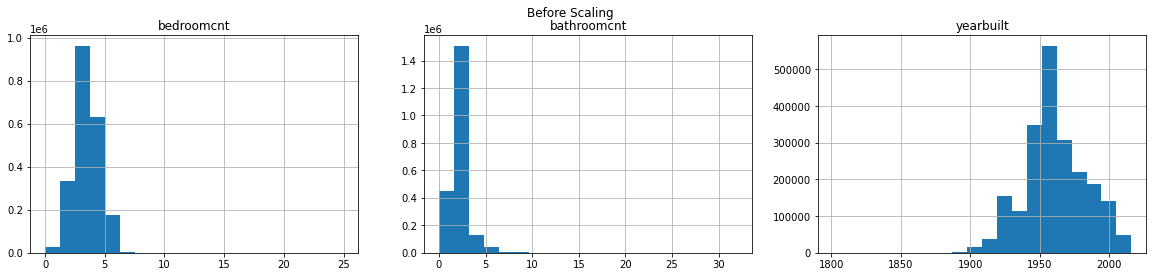

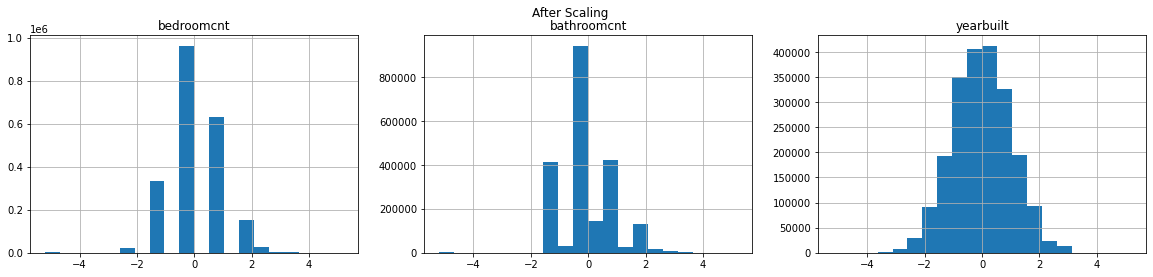

In [124]:
before_after_scale(stand_columns)

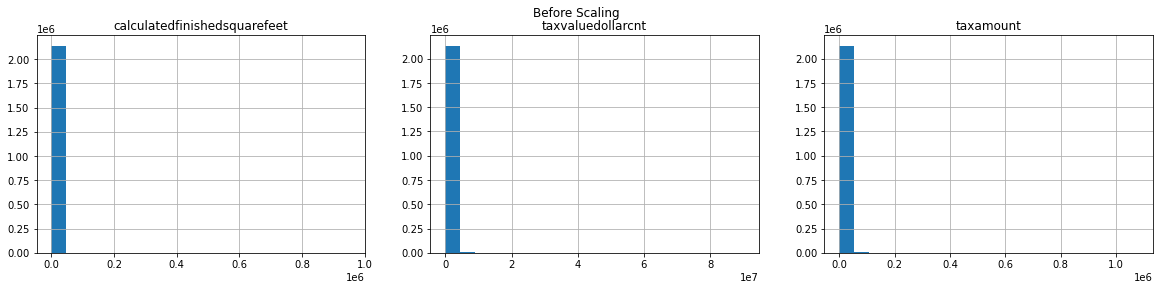

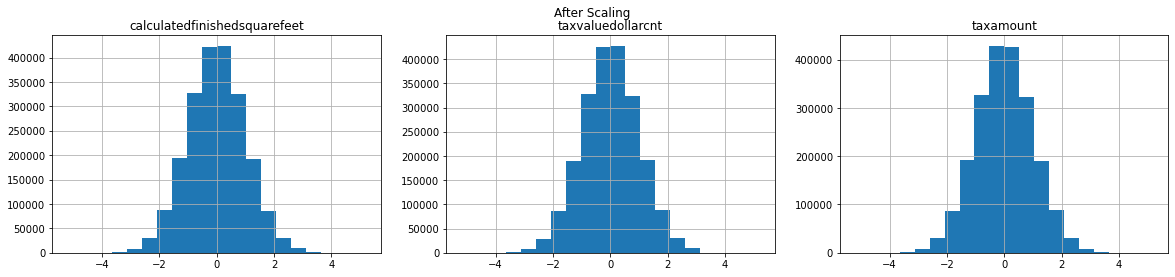

In [125]:
before_after_scale(log_columns)

#### 4. Use the ```QuantileTransformer```, but omit the ```output_distribution``` argument. Visualize your results. What do you notice?

In [126]:
df_scaled = df.copy()

In [127]:
quant_tr = QuantileTransformer()
df_scaled[stand_columns] = quant_tr.fit_transform(df_scaled[stand_columns])
df_scaled[log_columns] = quant_tr.fit_transform(df_scaled[log_columns])

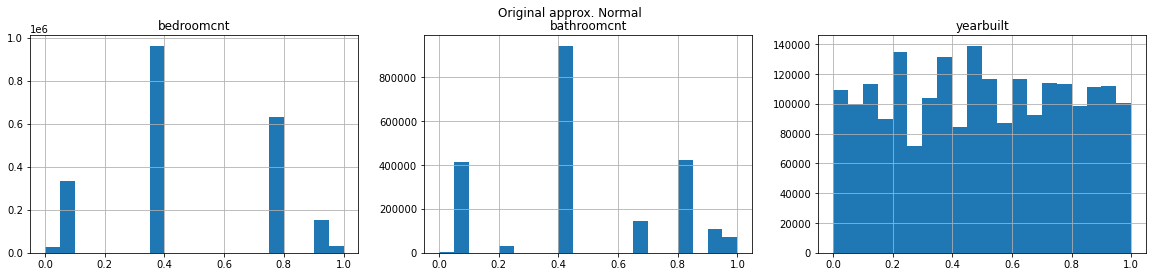

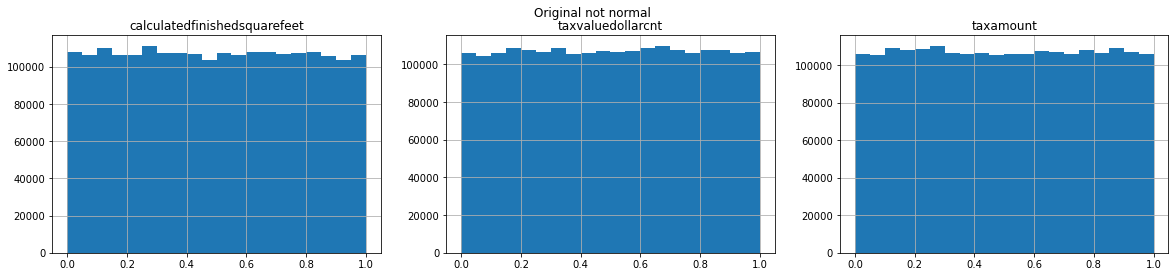

In [128]:
# visualize columns that had approx normal distribution 
# in the original data set
plt.figure(figsize = (20,4))
plt.suptitle('Original approx. Normal')
for i, col in enumerate(stand_columns):
    sbplt = i+1
    plt.subplot(1, 3, sbplt)
    plt.title(col)
    df_scaled[col].hist(bins = 20)
    
# visualize columns that were not normally distributed
# in the original data set
plt.figure(figsize = (20,4))
plt.suptitle('Original not normal')
for i, col in enumerate(log_columns):
    sbplt = i+1
    plt.subplot(1, 3, sbplt)
    plt.title(col)
    df_scaled[col].hist(bins = 20)

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your ```prepare.py``` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [153]:
df.columns[1:-1]

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

In [ ]:
def scale_zillow(train, validate, test):
    '''
    accepts train, validate, test data sets
    scales the data in each of them
    returns transformed data sets
    '''
    #count_columns = ['bedroomcnt', 'bathroomcnt']
    
    col = df.columns[1:-1]
    
    # create scalers
    #min_max_scaler = MinMaxScaler()    
    qt = QuantileTransformer(output_distribution='normal')
    qt.fit(train[col])
    train[col] = qt.transform(train[col])
    validate[col] = qt.transform(validate[col])
    test[col] = qt.transform(test[col])
    
    return train, validate, test

*Check if new wrangle functions are working*

In [2]:
df = wr.get_zillow()

In [6]:
train1, validate1, test1 = wr.split_zillow(df)

In [7]:
train, validate, test = wr.scale_zillow(train, validate, test)

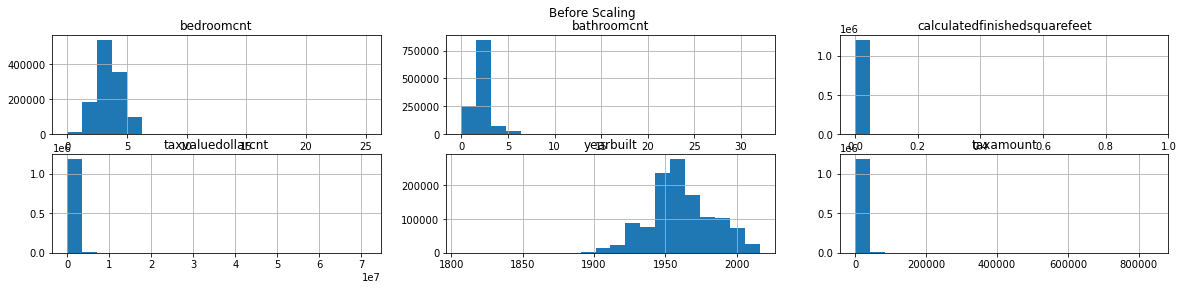

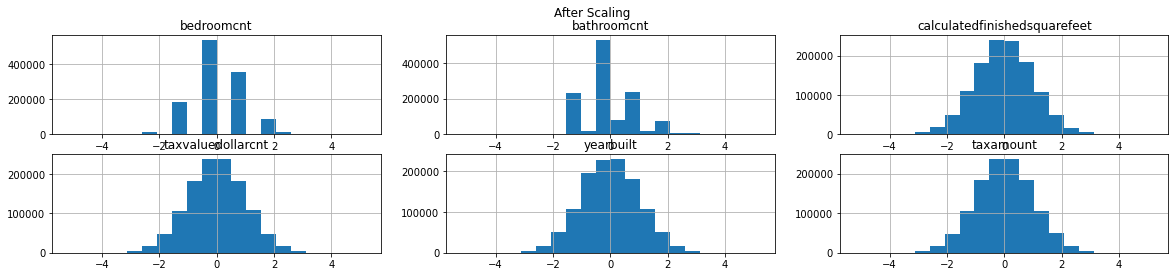

In [11]:
columns = train.columns[1:-1]
plt.figure(figsize = (20,4))
plt.suptitle('Before Scaling')
for i, col in enumerate(columns):
    sbplt = i+1
    plt.subplot(2, 3, sbplt)
    plt.title(col)
    train1[col].hist(bins = 20)
plt.figure(figsize = (20,4))
plt.suptitle('After Scaling')
for i, col in enumerate(columns):
    sbplt = i+1
    plt.subplot(2, 3, sbplt)
    plt.title(col)
    train[col].hist(bins = 20)